## Manipulating the US - Baby Names dataset using pandas

In this assignment, you will use pandas to answer questions about a real world dataset. Understanding and pre-processing a dataset is a very important step when building a machine learning model. We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names#NationalNames.csv) from Kaggle that includes names from 2004 until 2014.

### Step 1. Import the pandas library

In [1]:
# YOUR CODE HERE
import pandas as pd
# YOUR CODE HERE

### Step 2. Import the dataset
Import the csv dataset from the `data/US_Baby_Names_right.csv` file and assign it to a variable called `baby_names`. Also use the `info` function to display the information about the dataset.

In [2]:
# YOUR CODE HERE
baby_names = pd.read_csv('data/US_Baby_Names_right.csv')
baby_names.info()
# YOUR CODE HERE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [9]:
baby_names.loc[:, 'Id']

0            11350
1            11351
2            11352
3            11353
4            11354
            ...   
1016390    5647422
1016391    5647423
1016392    5647424
1016393    5647425
1016394    5647426
Name: Id, Length: 1016395, dtype: int64

### Step 3. See the first 10 entries
List the first 10 entries of the dataset.

In [4]:
# YOUR CODE HERE
baby_names.head(10)
# YOUR CODE HERE

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Step 4. Delete the column 'Unnamed: 0' and 'Id'

In [5]:
# YOUR CODE HERE
# deletes Unnamed: 0
del baby_names['Unnamed: 0']
# deletes Id
del baby_names['Id']
# YOUR CODE HERE

baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### Step 5. Are there more male or female names in the dataset?
Write your code that answers the question using the `Gender` column. Shorter code is better.

In [6]:
# YOUR CODE HERE
baby_names["Gender"].value_counts()['M'] > baby_names["Gender"].value_counts()['F']
# YOUR CODE HERE

False

### Step 6. Group the dataset by name and assign to names
Groupby the dataframe by the `Name` column and sum the `Count` column for each name.
Follow the comment instructions. You must provide code for all the comment instructions.

In [9]:
# YOUR CODE HERE
# you don't want to sum the Year column, so you delete it
del baby_names['Year']

# group the data and sum
sum_count = baby_names.groupby(['Name']).sum()
# print the first 5 observations
print(sum_count.head())

# print the size of the dataset
print('================')
print(len(sum_count)) # sum_count.shape[0]

# sort the Count column from the biggest value to the smallest one
sorted_sum_count = sum_count.sort_values(by='Count', ascending=False)
sorted_sum_count
# YOUR CODE HERE


         Count
Name          
Aaban       12
Aadan       23
Aadarsh      5
Aaden     3426
Aadhav       6
17632


,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798
...,...
Eniola,5
Atlantis,5
Marci,5


### Step 7. How many different names exist in the dataset?

In [7]:
# as we have already grouped by the name, all the names are unique already. 
# get the length of names
# YOUR CODE HERE
len(sorted_sum_count) 
# YOUR CODE HERE

17632

### Step 8. What is the name with most occurrences?

In [8]:
# YOUR CODE HERE
sorted_sum_count.idxmax()
# YOUR CODE HERE

Count    Jacob
dtype: object

### Step 9. How many different names have the least occurrences?

In [9]:
# YOUR CODE HERE
len(sorted_sum_count[sorted_sum_count.Count == sorted_sum_count.Count.min()])
# YOUR CODE HERE

2578

### Step 10. List all the names that have the `Count` which is the same as the median.

In [10]:
# YOUR CODE HERE
sorted_sum_count[sorted_sum_count.Count == sorted_sum_count.Count.median()]
# YOUR CODE HERE

,Count
Name,
Zuleima,49
Vita,49
Aziah,49
Kaedence,49
Antonina,49
...,...
Mckynzie,49
Yoni,49
Hareem,49


### Step 11. Get a summary with the mean, min, max, std and quartiles of names `Count`.

In [12]:
# YOUR CODE HERE
sorted_sum_count.Count.describe()
# YOUR CODE HERE

count     17632.000000
mean       2008.932169
std       11006.069468
min           5.000000
25%          11.000000
50%          49.000000
75%         337.000000
max      242874.000000
Name: Count, dtype: float64

### (Optional) BONUS QUESTIONS

### Step 13. Plot the most 10 count names (using bar graph)

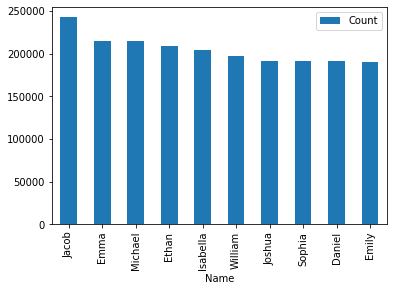

In [14]:
# YOUR CODE HERE
# get the most 10 count names
most_10_names = sorted_sum_count.head(10)

# plot them
most_10_names.plot.bar()
# YOUR CODE HERE

### Step 14. Plot the most 10 count names that start with 'J' (using bar graph)

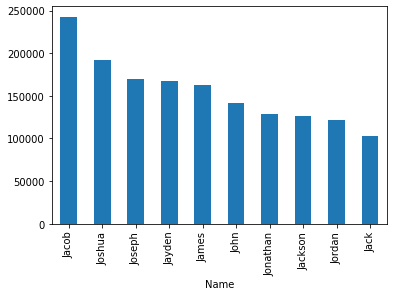

In [16]:
# YOUR CODE HERE
# get the most 10 count names
most_10_J_names = sorted_sum_count.Count.filter(regex='^J').head(10)
# plot them
most_10_J_names.plot.bar()
# YOUR CODE HERE
